In [1]:
import pandas as pd
import json
import altair as alt
import matplotlib.pyplot as plt

In [2]:
movie_data = pd.read_csv('tmdb_6000_movie_dataset.csv')
movie_data.head()

,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# drop columns that aren't relevant for analysis
drop_columns = ['Unnamed: 0','homepage', 'tmdbId', 'keywords','overview', 'original_language','production_companies', 'original_title', 'tagline'] 
movie_data = movie_data.drop(drop_columns, axis = 1)

In [4]:
movie_data.dropna(inplace=True)

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795 entries, 0 to 5797
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5795 non-null   int64  
 1   genres                5795 non-null   object 
 2   popularity            5795 non-null   float64
 3   production_countries  5795 non-null   object 
 4   release_date          5795 non-null   object 
 5   revenue               5795 non-null   int64  
 6   runtime               5795 non-null   float64
 7   spoken_languages      5795 non-null   object 
 8   status                5795 non-null   object 
 9   title                 5795 non-null   object 
 10  vote_average          5795 non-null   float64
 11  vote_count            5795 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 588.6+ KB


In [6]:
movie_data.isnull().sum()

budget                  0
genres                  0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [7]:
# create new column for profit: use adjusted as that's adjusted for inflation
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

In [10]:
def standardize_quotes(row):
    '''
    some rows in the columns we're cleaning use single quotes and some use double quotes.
    this function looks at a string and converts single quotes to double quotes.
    '''
    return row.replace("'", '"')

In [11]:
# makes every row in genre column have double quotes
movie_data['genres'] = movie_data['genres'].apply(standardize_quotes)
movie_data['production_countries'] = movie_data['production_countries'].apply(standardize_quotes)
movie_data['spoken_languages'] = movie_data['spoken_languages'].apply(standardize_quotes)

In [12]:
def get_data(row, column_name):
    '''
    for a specified row of data, returns the relevant column information 
    (ie. just genres, production countries, etc.)
    '''
    # use load json to convert each row of data to a 
    # string instead of having to deal with list of dict: https://www.geeksforgeeks.org/json-load-in-python/#
    genre_list = json.loads(row[column_name])
    
    all_genres = []
    for genre in genre_list:
        all_genres.append(genre['name'])
    return all_genres

In [13]:
# args allows the function to be applied to a specific column of data
movie_data['genres'] = movie_data.apply(get_data,args=('genres',), axis=1)
movie_data['production_countries'] = movie_data.apply(get_data,args=('production_countries',), axis=1)
movie_data['spoken_languages'] = movie_data.apply(get_data,args=('spoken_languages',), axis=1)

In [15]:
def create_filter(condition, column):
    '''
    creates a filtered df which includes any row where a certain value is in a column. 
    Multiple columns have a list of values, ex. (genres, countries), 
    so this pulls a value if it appears in the row.
    '''
    filtered_rows = []
    for i in range(len(movie_data[column])):
        if condition in movie_data[column][i]:
            filtered_rows.append(movie_data.iloc[i])
    
    filtered_df = pd.DataFrame(filtered_rows)
    return filtered_df

In [16]:
# create profit ranges

bins = [-float('inf'), 0, 5000000, 10000000, 20000000, 50000000, 100000000, 200000000, 500000000, 750000000, 1000000000, float('inf')]
labels = ['Lost Money', '$0-5M', '$5-10M', '$10-20M','$20-50M','$50-100M', '$100-200M','$200-500M', '$500-750M', '$750M-1B', '$1B+']

movie_data['profit_buckets'] = pd.cut(movie_data['profit'], bins=bins, labels=labels)
movie_data

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,profit_buckets
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.200,11800,2550965087,$1B+
1,300000000,"[Adventure, Fantasy, Action]",139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.900,4500,661000000,$500-750M
2,245000000,"[Action, Adventure, Crime]",107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.300,4466,635674609,$500-750M
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Dark Knight Rises,7.600,9106,834939099,$750M-1B
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,[United States of America],2012-03-07,284139100,132.0,[English],Released,John Carter,6.100,2124,24139100,$20-50M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,0,"[Comedy, Drama]",53.988000,[United States of America],2023-03-11,0,99.0,"[English, Español]",Released,Flamin' Hot,8.190,410,0,Lost Money
5794,0,"[Action, Thriller]",47.740000,[],2023-04-21,0,93.0,[English],Released,The Best Man,6.167,93,0,Lost Money
5795,0,"[Action, Adventure]",27.587000,[France],2023-10-19,0,0.0,[Français],Released,Drone Games,2.000,1,0,Lost Money
5796,0,[Documentary],47.684000,[United Kingdom],2023-10-20,0,92.0,[English],Released,The Pigeon Tunnel,7.667,3,0,Lost Money


In [53]:
# create df of just recent movies (maybe make 2nd 2 lines from lines to filters on charts)
recent_movies = movie_data.loc[movie_data['Release Year'] >= 2010]
recent_movies = recent_movies.loc[recent_movies['budget'] >= 100000000]
recent_movies = recent_movies.loc[recent_movies['popularity'] <= 500]

Visualizations

In [43]:
us_movies = create_filter('United States of America', 'production_countries')

TypeError: argument of type 'float' is not iterable

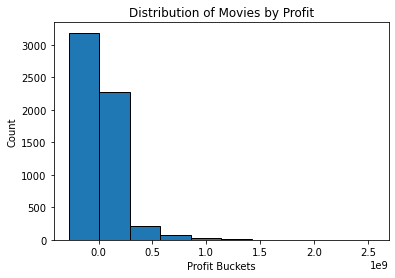

In [18]:
# STATIC GRAPH WORKS CORRECTLY: Histogram of movie distribution by profit
plt.hist(movie_data['profit'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Profit Buckets')
plt.ylabel('Count')
plt.title('Distribution of Movies by Profit')
plt.show()

In [44]:
movie_data.head(2)

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,profit_buckets,Release Year,Main Genre,Lead Production Country
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Avatar,7.2,11800.0,2.550965e+09,$1B+,2009.0,Action,United States of America
1,300000000.0,"[Adventure, Fantasy, Action]",139.082615,[United States of America],2007-05-19,9.610000e+08,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500.0,6.610000e+08,$500-750M,2007.0,Adventure,United States of America


In [45]:
# STATIC GRAPH WORKS CORRECTLY: avg revenue by decade
movie_data['decade'] = (movie_data['Release Year'] // 10) * 10

average_revenue_by_decade = movie_data.groupby('decade')['revenue'].mean().reset_index()

chart = alt.Chart(average_revenue_by_decade).mark_bar().encode(
    x='decade:O',  
    y='revenue:Q',  
    tooltip=['decade:O', 'revenue:Q'],  
).properties(
    width=600,
    height=400,
    title='Average Revenue by Decade'
)
chart

alt.Chart(...)

In [23]:
movie_data.dropna(inplace=True)
# DATA PREPROCESSING
# make column of just release year
release_yrs = []
for idx, row in movie_data.iterrows():
    release_yrs.append(int(row['release_date'][:4]))

release_yr_series = pd.Series(release_yrs, name='Release Year')

movie_data = pd.concat([movie_data, release_yr_series.to_frame()], axis=1)

In [25]:
movie_data.dropna(inplace=True)
# DATA PREPROCESSING
# make column of primary genre
main_genre = []
for idx, row in movie_data.iterrows():
    if len(row['genres']) >= 1:
        main_genre.append(row['genres'][0])
    else:
        main_genre.append('None')

main_genre_series = pd.Series(main_genre, name='Main Genre')

movie_data = pd.concat([movie_data, main_genre_series.to_frame()], axis=1)

In [26]:
movie_data.dropna(inplace=True)
# DATA PREPROCESSING
# make column of primary production country
main_country = []
for idx, row in movie_data.iterrows():
    if len(row['production_countries']) >= 1:
        main_country.append(row['production_countries'][0])
    else:
        main_country.append('None')

main_country_series = pd.Series(main_country, name='Lead Production Country')
movie_data = pd.concat([movie_data, main_country_series.to_frame()], axis=1)

movie_data.to_csv('movie_data_master.csv', index=False)

In [47]:
# INTERACTIVE 4D BUBBLE CHART WORKS CORRECTLY
# 4d visual
genre_radio = alt.binding_radio(options=genres, name="Main Genre")
genre_select = alt.selection_single(fields=['Main Genre'], bind=genre_radio)

base = alt.Chart(recent_movies).mark_point(filled=True).add_selection(
    genre_select
).encode(
    alt.X('budget', axis=alt.Axis(title='Budget ($)')),
    alt.Y('popularity', axis=alt.Axis(title='Popularity')),
    opacity=alt.condition(genre_select, 'Main Genre', alt.value(0)),
    size='vote_count',
    tooltip=['title:N', 'revenue:Q']
).properties(
    width=800,
    height=300
).interactive()

genre_color_condition = alt.condition(
    genre_select,
    alt.Color('Main Genre:N'),
    alt.value('lightgray')
)

highlight_regions = base.add_selection(
    genre_select
).encode(
    color=genre_color_condition
).properties(title='Popularity vs. Budget of Movies since 2010')
highlight_regions

alt.Chart(...)

In [49]:
recent_movies.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,profit_buckets,Release Year,Main Genre,Lead Production Country
2,245000000.0,"[Action, Adventure, Crime]",107.376788,"[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466.0,6.356746e+08,$500-750M,2015.0,Action,United Kingdom
3,250000000.0,"[Action, Crime, Drama, Thriller]",112.312950,[United States of America],2012-07-16,1.084939e+09,165.0,[English],Released,The Dark Knight Rises,7.6,9106.0,8.349391e+08,$750M-1B,2012.0,Action,United States of America
4,260000000.0,"[Action, Adventure, Science Fiction]",43.926995,[United States of America],2012-03-07,2.841391e+08,132.0,[English],Released,John Carter,6.1,2124.0,2.413910e+07,$20-50M,2012.0,Action,United States of America
6,260000000.0,"[Animation, Family]",48.681969,[United States of America],2010-11-24,5.917949e+08,100.0,[English],Released,Tangled,7.4,3330.0,3.317949e+08,$200-500M,2010.0,Animation,United States of America
7,280000000.0,"[Action, Adventure, Science Fiction]",134.279229,[United States of America],2015-04-22,1.405404e+09,141.0,[English],Released,Avengers: Age of Ultron,7.3,6767.0,1.125404e+09,$1B+,2015.0,Action,United States of America


In [51]:
pass
"""
# attempt to add more sliders/filters to above visual
custom_x_range = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

slider = alt.binding_range(min=0, max=recent_movies['Release Year'].max(), step=2)
cutoff = alt.selection_single(bind=slider, fields=['value'], init={'value': 10000})

alt.Chart(recent_movies).mark_point().add_selection(cutoff).encode(
    x=alt.X('population:Q', scale=alt.Scale(domain=custom_x_range)),
    y='health:Q',
    tooltip=['country:N', 'population:Q'],
    opacity=alt.condition(
        alt.datum.population > cutoff.value,
        alt.value(0), alt.value(1)
    )
).interactive()
"""

"\n# attempt to add more sliders/filters to above visual\ncustom_x_range = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]\n\nslider = alt.binding_range(min=0, max=recent_movies['Release Year'].max(), step=2)\ncutoff = alt.selection_single(bind=slider, fields=['value'], init={'value': 10000})\n\nalt.Chart(recent_movies).mark_point().add_selection(cutoff).encode(\n    x=alt.X('population:Q', scale=alt.Scale(domain=custom_x_range)),\n    y='health:Q',\n    tooltip=['country:N', 'population:Q'],\n    opacity=alt.condition(\n        alt.datum.population > cutoff.value,\n        alt.value(0), alt.value(1)\n    )\n).interactive()\n"

In [54]:
# scale params
x_scale = alt.Scale(domain=(100000000, 400000000))
y_scale = alt.Scale(domain=(0, 1000))
x_domain = [0, 300000000]

# [OLD?] STATIC VERSION OF 4D BUBBLE CHART
alt.Chart(recent_movies).mark_point().encode(
    x=alt.X('budget', scale=x_scale),
    y=alt.Y('popularity'),
    color='Main Genre',
    size='vote_count')

alt.Chart(...)

In [55]:
yr_genre_groups = movie_data.groupby(['Release Year', 'Main Genre']).count()
yr_list = yr_genre_groups.index.levels[0].tolist()
genre_list = yr_genre_groups.index.levels[1].tolist()
yr_genre_groups.reset_index(inplace=True)

In [56]:
for yr in yr_genre_groups['Release Year'].unique():
    yr_data = yr_genre_groups.loc[yr_genre_groups['Release Year'] == yr]
    temp_list = yr_data['genres'] / yr_data['genres'].sum()
    temp_ser = pd.Series(temp_list, name='Percentage')
    yr_data = pd.concat([yr_data, temp_ser.to_frame()], axis = 1)

In [57]:
temp_list = yr_data['genres'] / yr_data['genres'].sum()
temp_ser = pd.Series(temp_list, name='Percentage')

In [58]:
yrs = []
for yr in range(1975,2024):
    yrs.append(yr)

In [59]:
genres = list(movie_data['Main Genre'].unique())
genres.remove('Mystery')
genres.remove('Music')
genres.remove('War')
genres.remove('Western')
genres.remove('None')
genres.remove('History')
genres.remove('TV Movie')
genres.remove('Foreign')

In [35]:
charts = []
for yr in yrs:
#for yr in yr_genre_groups['Release Year'].unique():
    yr_data = yr_genre_groups.loc[yr_genre_groups['Release Year'] == yr]
    temp_list = yr_data['genres'] / yr_data['genres'].sum()
    temp_ser = pd.Series(temp_list, name='Percentage')
    yr_data = pd.concat([yr_data, temp_ser.to_frame()], axis = 1)
    
    # filter out irrelevant genres
    yr_data = yr_data[yr_data['Main Genre'].isin(genres)]

    # Create pie chart for each year
    pie_chart = alt.Chart(yr_data).mark_arc().encode(
        theta=alt.Theta('Percentage:Q'),
        color=alt.Color('Main Genre:N', scale=alt.Scale(scheme='category20')),
        tooltip=['Main Genre', 'Percentage']
    ).properties(
        title=str(yr),
        width=100,
        height=100
    ).transform_calculate(
        order="'Movies produced in ' + datum.Year + ': ' + datum.Genre"
    )
    charts.append(pie_chart)

# Create a selection
slider = alt.binding_range(min=1960, max=2025, step=5)
selector = alt.selection_single(name="selector",
                                fields=['Release Year'],
                                bind=slider,
                                init={'Release Year': 1960})
    
# Concatenate facet charts
facet_chart = alt.hconcat(*charts)

facet_chart.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)

alt.HConcatChart(...)

In [36]:
# Concatenate facet charts
facet1 = alt.hconcat(charts[6],charts[5],charts[4],charts[3],charts[2],charts[1],charts[0])
facet2 = alt.hconcat(charts[13],charts[12],charts[11],charts[10],charts[9],charts[8],charts[7])
facet3 = alt.hconcat(charts[20],charts[19],charts[18],charts[17],charts[16],charts[15],charts[14])
facet4 = alt.hconcat(charts[27],charts[26],charts[25],charts[24],charts[23],charts[22],charts[21])
facet5 = alt.hconcat(charts[34],charts[33],charts[32],charts[31],charts[30],charts[29],charts[28])
facet6 = alt.hconcat(charts[41],charts[40],charts[39],charts[38],charts[37],charts[36],charts[35])
facet7 = alt.hconcat(charts[48],charts[47],charts[46],charts[45],charts[44],charts[43],charts[42])

facet1.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet2.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet3.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet4.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet5.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet6.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet7.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
)
facet7 & facet6 & facet5 & facet4 & facet3 & facet2 & facet1

alt.VConcatChart(...)

In [38]:
df=gapminder
custom_x_range = [1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025]

slider = alt.binding_range(min=0, max=gapminder['Release Year'].max(), step=5)
cutoff = alt.selection_single(bind=slider, fields=['value'], init={'value': 1970})

alt.Chart(df).mark_point().add_selection(cutoff).encode(
    x=alt.X('population:Q', scale=alt.Scale(domain=custom_x_range)),
    y='health:Q',
    tooltip=['country:N', 'population:Q'],
    opacity=alt.condition(
        alt.datum.population > cutoff.value,
        alt.value(0), alt.value(1)
    )
).interactive()

NameError: name 'gapminder' is not defined

In [39]:
# Sample data
data = pd.DataFrame({
    'x': range(1920,2030),
    'y': range(1910,2020)
})

# Create a selection
slider = alt.binding_range(min=1960, max=2025, step=5)
selector = alt.selection_single(name="selector", fields=['x'], bind=slider, init={'x': 1960})

# Create a scatter plot with a selection
scatter = alt.Chart(data).mark_point().encode(
    x='x',
    y='y',
    color=alt.condition(selector, alt.value('steelblue'), alt.value('lightgray'))
).add_selection(
    selector
)

# Create other charts as needed
# chart2 = ...

# Concatenate the charts
concatenated_chart = alt.hconcat(scatter)  # Add other charts as needed

concatenated_chart


alt.HConcatChart(...)

In [40]:
genre_counts = {}
for genre in movie_data['Main Genre'].unique():
    genre_counts[genre] = len(movie_data[movie_data['Main Genre'] == genre])

    # Sample dataset
data = {
    'Year': [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],
    'Genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama'],
    'Count': [20, 15, 10, 25, 20, 15, 30, 25, 20]  # Example counts of movies
}

df = pd.DataFrame(data)

# Create facets for each year
charts = []
for year in movie_data['Release Year'].unique():
    yr_data = movie_data[movie_data['Release Year'] == year]
    
    # Calculate percentage of each genre for the year
    yr_data['Percentage'] = movie_data['Main Genre'].value_counts() / len(movie_data['Main Genre']) * 100
    
    # Create pie chart for each year
    pie_chart = alt.Chart(yr_data).mark_arc().encode(
        theta = alt.Theta('Percentage')
        color=alt.Color('Main Genre:N', legend=None),
        tooltip=['Main Genre', 'Percentage']
    ).properties(
        title=f'Movies produced in {year}'
    ).transform_calculate(
        order="'Movies produced in ' + datum.Year + ': ' + datum.Genre"
    )
    
    charts.append(pie_chart)

# Concatenate facet charts
facet_chart = alt.hconcat(*charts)

facet_chart.properties(
    title='Distribution of movie genres over years'
).configure_view(
    stroke=None
).configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


SyntaxError: invalid syntax (<ipython-input-40-e2f69d990ffe>, line 25)

In [41]:
# STATIC GRAPH THAT WORKS. NEED TO CONDENSE INTO FEWER GENRES
# filtered out irrelevant genres
recent_movies = movie_data.loc[movie_data['Release Year'] >= 2010]

alt.Chart(recent_movies).mark_bar().encode(
    y=alt.Y('average(runtime):Q', title='Average Runtime (in minutes)'),
    x=alt.X('Main Genre:N', title='Genre', sort='-y'),
    color=alt.Color('Main Genre:N', scale=alt.Scale(scheme='category20'))
).properties(
    title = 'Average Runtime for Each Genre for Movies since 2010',
    width = 500
)

alt.Chart(...)

In [42]:
profit_bucket_order = ['Lost Money', '$20-50M', '$500-750M', '$750M-1B', '$1B+']

bucket_counts = us_movies['profit_buckets'].value_counts().reindex(profit_bucket_order).reset_index()
bucket_counts.columns = ['Profit Buckets', 'Count of Movies']
bucket_counts['Profit Buckets'] = pd.Categorical(bucket_counts['Profit Buckets'], categories=profit_bucket_order, ordered=True)

alt.Chart(bucket_counts).mark_bar().encode(
    x=alt.X('Profit Buckets:O', title='Profit Buckets', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('Count of Movies:Q', title='Count of Movies'),
    color=alt.Color('Profit Buckets:N', scale=alt.Scale(scheme='category20')),
    tooltip=['Profit Buckets', 'Count of Movies']
).properties(
    width=400,
    height=300,
    title='Distribution of Profit for American Movies'
)

NameError: name 'us_movies' is not defined